# ⭐️ Super Mario only eats edible mushrooms 🍄‍🟫

Hello! Nice to meet you!
This EDA & Preprocessing notebook is writted for **Binary Prediction of Poisonous Mushrooms** in the **Playground S4E8**
I would be very happy if my notebook would help you.
If find this notebook helpful please consider upvoting 😄

# ⭐️ Table of Contents

1. Goal & Evaluation of this Competition
2. Description of Columns 
3. Importing the Libraries
4. Laoding the Dataset
5. Basic EDA
    - Head, Tail, Shape, Duplicates, Descriptive Statistics
    - Grouping Columns (Numerical Features vs Categorical Features)
    - ***Visualizing Missing Values***
6. Preprocessing the Data
    - ***Dealing with Missing Values***
    - ***Dealing with label which has few counts***
7. Visualize EDA
    - Target Distribution
    - Numerical Features Distribution
    - Categorical Features Distribution
    - Correlationship between Numerical Features and Numerical Features
    - Correlationship between Numerical Features and Target
    - Correlationship between Categorical Features and Target
8. Modeling
9. Evaluating
10. Submitting

## 1. Goal & Evaluation of this Competition

### The goal of this competition is to predict whether a mushroom is edible or poisonous based on its physical characteristics - shape/colors of cap, width/height of stem etc - .

### The evaluation of this competition is MCC(Matthews correlation coefficient ).

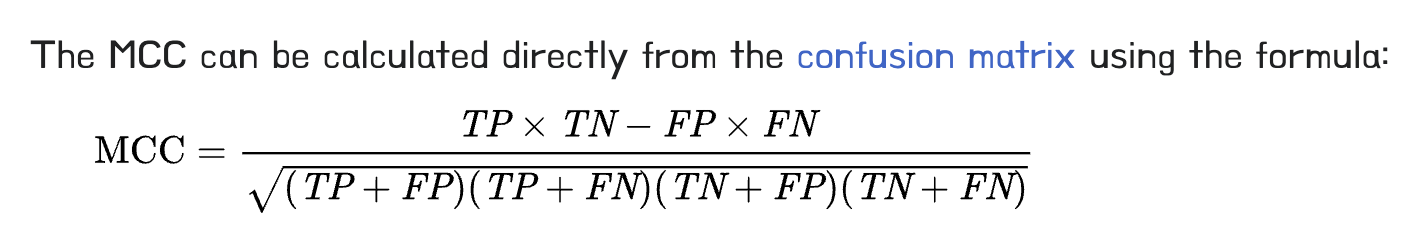

## 2. Description of Columns 

### There're 20 columns for explain physical characteristics of a mushroom. The picture below showing the mushroom structure will help you understanding the meaning of columns.

![Structure of Mushrooms](https://blog.kakaocdn.net/dn/bS8Lps/btqVqFmKi4E/GFyB9cX9er9ayeqIIbFeJk/img.jpg)

1. **id** : A unique identifier for each mushroom specimen.
2. **class** : The classification of the mushroom as either edible or poisonous. **(Target)**
3. **cap-diameter** : The diameter of the mushroom's cap.
4. **cap-shape** : The shape of the mushroom's cap.
5. **cap-surface** : The texture of the surface of the mushroom's cap.
6. **cap-color** : The color of the mushroom's cap.
7. **does-bruise-or-bleed** : Indicates whether the mushroom bruises or bleeds when damaged.
8. **gill-attachment** : How the gills are attached to the mushroom's stem.
9. **gill-spacing** : The spacing between the mushroom's gill.
10. **gill-color** : The color of the mushroom's gill.
11. **stem-height** : The height of the mushroom's stem.
12. **stem-width** : The width of the mushroom's stem.
13. **stem-root** : The type of root structure of the mushroom's stem.
14. **stem-surface** : The texture of the surface of the mushroom's stem.
15. **stem-color** : The color of the mushroom's stem.
16. **veil-type** : The type of mushroom's veil.
17. **veil-color** : The color of the mushroom's veil.
18. **has-ring** : Whether the mushroom has a ring on the stem.
19. **ring-type** : The type of ring on the mushroom's stem.
20. **spore-print-color** : The color of the spore print produced by the mushroom.
21. **habitat** : The type of environment where the mushroom is found.
22. **season** : The season during which the mushroom is typically found.

> [cookie image] Mushroom's Veil 

![veil_of_mushrooms](http://jlrexplore.com/wp-content/uploads/2015/10/Image-01.jpg)

## 3. Importing the Libraries


In [1]:
# Basic & EDA
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import matthews_corrcoef

# Model library
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


random_state = 42

## 4. Laoding the Dataset

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
df_smaple_submission = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')

## 5. Basic EDA
### Head, Tail, Shape, Missing Values, Duplicates, Descriptive Statistics etc

In [3]:
pd.options.display.max_columns = None
print('Head 10 Examples of Train Dataset :')
df_train.head(10)

Head 10 Examples of Train Dataset :


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,t,n,f,s,c,n,5.91,8.20,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,19.07,12.69,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,8.31,9.77,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,h,e,f,x,d,w,5.77,17.13,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,t,n,f,a,d,w,7.13,12.77,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [4]:
pd.options.display.max_columns = None
print('Tail 10 Examples of Train Dataset : ')
df_train.tail(10)

Tail 10 Examples of Train Dataset : 


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
3116935,3116935,p,14.58,x,d,n,f,p,NaN,p,14.78,35.76,s,y,w,NaN,NaN,f,f,NaN,d,a
3116936,3116936,p,1.70,x,k,n,f,NaN,NaN,n,4.77,1.61,NaN,NaN,n,NaN,NaN,f,f,NaN,d,w
3116937,3116937,p,0.69,x,g,o,f,NaN,NaN,y,3.51,0.73,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
3116938,3116938,p,9.08,s,t,p,t,d,c,p,8.07,14.70,NaN,NaN,p,NaN,NaN,t,f,NaN,d,a
3116939,3116939,p,9.30,o,NaN,e,f,f,f,f,3.42,25.38,NaN,g,n,NaN,NaN,f,f,NaN,d,u
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,NaN,y,w,NaN,NaN,t,p,NaN,d,u
3116944,3116944,p,3.20,x,s,g,f,d,c,w,2.82,7.79,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u


In [5]:
print('The shape of train dataset is', df_train.shape)
print('The shape of test dataset is', df_test.shape)

The shape of train dataset is (3116945, 22)
The shape of test dataset is (2077964, 21)


In [6]:
print('The duplicate rows in the train dataset :', df_train.duplicated().sum() )

The duplicate rows in the train dataset : 0


In [7]:
print('The duplicate rows in the test dataset :', df_test.duplicated().sum() )

The duplicate rows in the test dataset : 0


In [8]:
print('The Descriptive Statistics of Train Data : \n')
df_train.describe().T

The Descriptive Statistics of Train Data : 



,count,mean,std,min,25%,50%,75%,max
id,3116945.0,1.558472e+06,899784.661737,0.00,779236.00,1558472.00,2337708.00,3116944.00
cap-diameter,3116941.0,6.309848e+00,4.657931,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333e+00,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,1.115379e+01,8.095477,0.00,4.97,9.65,15.63,102.90


In [9]:
print('The Descriptive Statistics of Test Data : \n')
df_test.describe().T

The Descriptive Statistics of Test Data : 



,count,mean,std,min,25%,50%,75%,max
id,2077964.0,4.155926e+06,599856.681721,3116945.0,3636435.75,4155926.50,4675417.25,5194908.00
cap-diameter,2077957.0,6.306192e+00,4.685462,0.0,3.31,5.74,8.23,607.00
stem-height,2077963.0,6.346509e+00,2.698978,0.0,4.67,5.88,7.41,57.29
stem-width,2077964.0,1.114837e+01,8.100181,0.0,4.97,9.64,15.62,102.91


### Grouping Columns (Numerical Features vs Categorical Features)

In [10]:
print('The data type of each columns of train dataset : \n')
df_train.info()

The data type of each columns of train dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                obje

In [11]:
columns = list(df_train.columns)
target = ['class']
num_columns = ['cap-diameter', 'stem-height', 'stem-width']
cat_columns = list(set(columns) - set(num_columns) - set(target))

In [12]:
print('columns :', columns)
print('target :', target)
print('num_columns :', num_columns)
print('cat_columns :', cat_columns)

columns : ['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
target : ['class']
num_columns : ['cap-diameter', 'stem-height', 'stem-width']
cat_columns : ['stem-color', 'season', 'stem-surface', 'id', 'has-ring', 'cap-shape', 'veil-type', 'cap-surface', 'veil-color', 'spore-print-color', 'gill-color', 'gill-attachment', 'gill-spacing', 'ring-type', 'cap-color', 'habitat', 'does-bruise-or-bleed', 'stem-root']


### Visualizing Missing Values

In [13]:
print('The missing valuse of train dataset : \n', df_train.isnull().sum())

The missing valuse of train dataset : 
 id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


In [14]:
print('The missing valuse of test dataset : \n' , df_test.isnull().sum())

The missing valuse of test dataset : 
 id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64


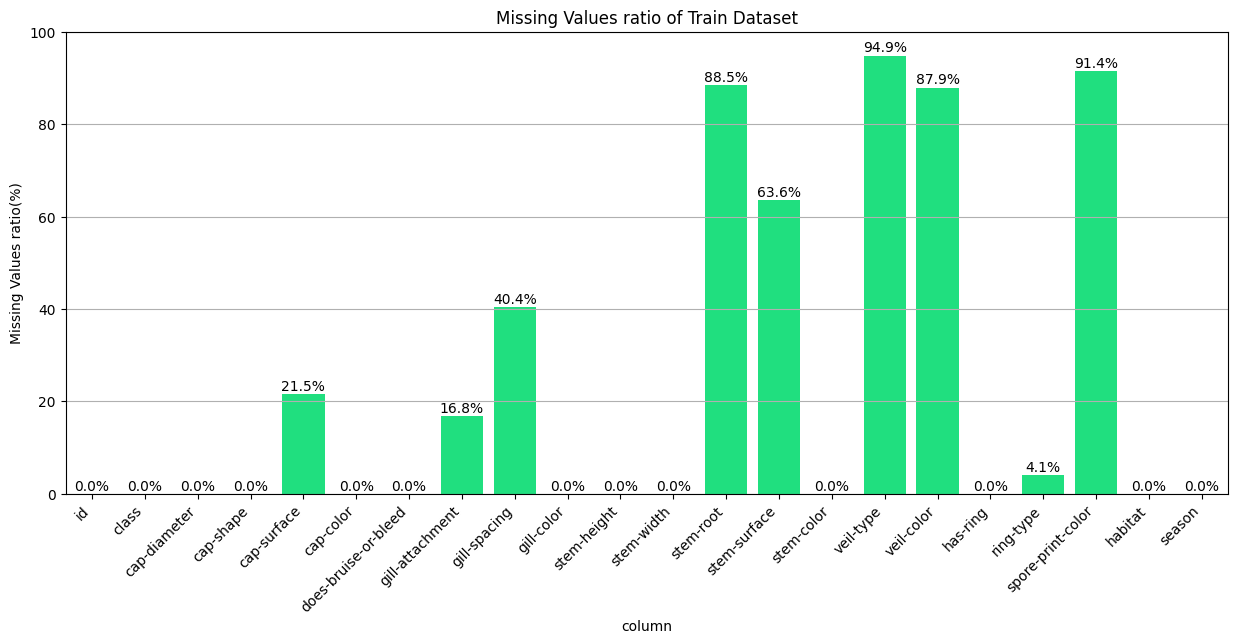

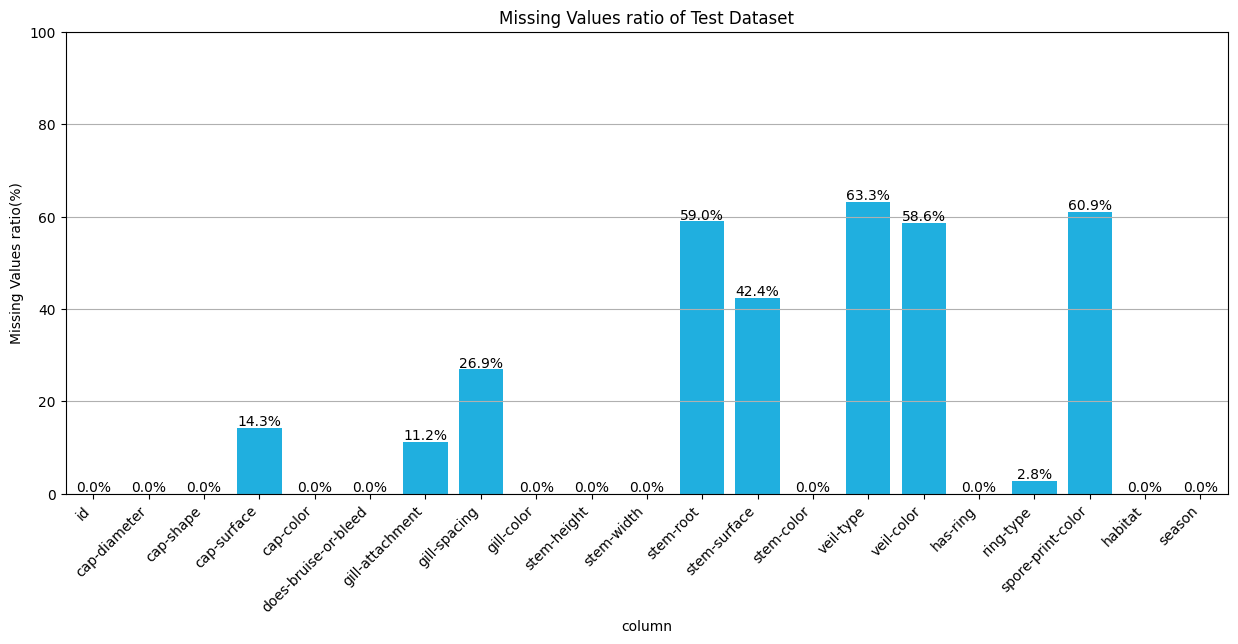

<Figure size 640x480 with 0 Axes>

In [15]:
# 첫번째 그래프
# 각 열의 결측치 비율 계산
missing_ratio1 = df_train.isnull().sum() / len(df_train) * 100

# DataFrame으로 변환
missing_df1 = pd.DataFrame({'column': missing_ratio1.index, 'missing_ratio': missing_ratio1.values})

# seaborn을 이용한 시각화 (깔끔하고 다양한 옵션 제공)
plt.figure(figsize=(15, 6))
plt.grid(True) # 그리드 추가
ax1 = sns.barplot(x='column', y='missing_ratio', data=missing_df1, color='#00FF7F')

# x축 레이블을 열 이름으로 설정 (회전하여 가독성 향상)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values ratio of Train Dataset')

# y축 레이블 설정
plt.yticks(range(0, 101, 20))
plt.ylabel('Missing Values ratio(%)')

# 각 막대 위에 결측치 비율 표시
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 0.8,
            '{:.1f}%'.format(height),
            ha="center")

# 두번째 그래프
# 각 열의 결측치 비율 계산
missing_ratio2 = df_test.isnull().sum() / len(df_train) * 100

# DataFrame으로 변환
missing_df2 = pd.DataFrame({'column': missing_ratio2.index, 'missing_ratio': missing_ratio2.values})

# seaborn을 이용한 시각화 (깔끔하고 다양한 옵션 제공)
plt.figure(figsize=(15, 6))
plt.grid(True) # 그리드 추가
ax2 = sns.barplot(x='column', y='missing_ratio', data=missing_df2, color='#00BFFF')

# x축 레이블을 열 이름으로 설정 (회전하여 가독성 향상)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values ratio of Test Dataset')

# y축 레이블 설정
plt.yticks(range(0, 101, 20))
plt.ylabel('Missing Values ratio(%)')

# 각 막대 위에 결측치 비율 표시
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            '{:.1f}%'.format(height),
            ha="center")

# 그래프 출력
plt.show()
    
    
    
# 그래프 출력
plt.tight_layout() # 두 그래프 사이의 간격 조절
plt.show()

### We have a lot missing values. We'll clean them on '6. Preprocessing the Data'

## 6. Preprocessing the Data

### Dealing with Missing Values

#### <1 step> Deleting Columns
- The top five columns with the most missing values in the Train dataset have a percentage of missing values above 50%. So I decide to delete the columns.

In [16]:
columns_drop = ['id', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']

In [17]:
columns_use = list(set(columns) - set(columns_drop))
cat_columns = list(set(columns_use) - set(num_columns))

In [18]:
print('columns to use :', columns_use)
print('num_columns :', num_columns)
print('cat_columns :', cat_columns)

columns to use : ['class', 'stem-color', 'gill-color', 'season', 'cap-diameter', 'has-ring', 'cap-shape', 'gill-attachment', 'gill-spacing', 'ring-type', 'cap-color', 'habitat', 'cap-surface', 'stem-height', 'does-bruise-or-bleed', 'stem-width']
num_columns : ['cap-diameter', 'stem-height', 'stem-width']
cat_columns : ['stem-color', 'season', 'has-ring', 'cap-shape', 'cap-surface', 'class', 'gill-color', 'gill-attachment', 'gill-spacing', 'ring-type', 'cap-color', 'habitat', 'does-bruise-or-bleed']


In [19]:
df_train_cleaned = df_train[columns_use]

In [20]:
df_train_cleaned.isnull().sum()

class                         0
stem-color                   38
gill-color                   57
season                        0
cap-diameter                  4
has-ring                     24
cap-shape                    40
gill-attachment          523936
gill-spacing            1258435
ring-type                128880
cap-color                    12
habitat                      45
cap-surface              671023
stem-height                   0
does-bruise-or-bleed          8
stem-width                    0
dtype: int64

#### <2 step> Replacing of Missing Values of Numerical Variables 
- Of the three numerical variables, only 'cap-diameter' has missing values. There are four missing values in the cap-diameter column, so replace them with suitable representative values. Check the skewness of the cap-diameter and replace them with the median value if the skewness is greater than 1 or the mean value if the skewness is less than 1.

In [21]:
df_train_cleaned['cap-diameter'].skew()

3.9726091701251063

In [22]:
median = df_train_cleaned['cap-diameter'].median()
df_train_cleaned['cap-diameter'].fillna(median, inplace=True)

In [23]:
df_train_cleaned['cap-diameter'].isnull().sum()

0

#### <3 step> Ignoring Missing Values of Categorical Variables
- Try to solve with an ensemble of tree-based models that are robust to processing missing values.

### Dealing with label which has few counts

In [24]:
df_train_cleaned.nunique().sort_values()

class                      2
season                     4
has-ring                  23
does-bruise-or-bleed      26
ring-type                 40
gill-spacing              48
habitat                   52
stem-color                59
gill-color                63
cap-shape                 74
cap-color                 78
gill-attachment           78
cap-surface               83
stem-height             2749
cap-diameter            3913
stem-width              5836
dtype: int64

In [25]:
# Checking the label names
for i in columns_use :
    labels = df_train_cleaned[i].unique()
    print("{}'s lables : ".format(i), labels, '\n')

class's lables :  ['e' 'p'] 

stem-color's lables :  ['w' 'o' 'n' 'y' 'e' 'u' 'p' 'f' 'g' 'r' 'k' 'l' 'b' '3.13' 't' 'z' 'a'
 'h' 'd' nan 's' '7.33' 'is n' 'i' 'c' 'x' 'e n' '1.75' 'm' '33.52'
 'ring-type' '2.78' 'spore-print-color' '23.59' '8.32' 'is w' '26.4'
 '4.75' '7.84' 'class' '2.75' '8.49' '4.49' '1.41' '17.45' '3.53' '12.92'
 '3.98' '20.07' '7.7' '22.6' '6.31' '6.09' '3.56' '3.37' '4.62' '2.54'
 '39.51' '18.06' '4.33'] 

gill-color's lables :  ['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'e' 'r' 'd' 't' '3.45' 'z' '5'
 '3.39' 'season' 'h' 'x' 's' '4' 'class' 'c' 'm' 'spacing' '0.92' nan
 '18.12' 'l' 'does w' 'a' '7.59' '8.06' '6.19' 'has-ring' '4.49' '9.46'
 '5.01' 'ring-type' '3.4' 'i' '17' '10.07' 'stem-root' '20.6'
 'spore-print-color' '18.03' 'does-bruise-or-bleed' '8.83' 'habitat'
 '10.21' '4.64' '6.4' 'is y' 'e y' '1.91' 'does n' '16.41' '6.41'
 'veil-type' '20.44' '8.37'] 

season's lables :  ['a' 'w' 'u' 's'] 

cap-diameter's lables :  [ 8.8   4.51  6.94 ... 38.11 55.63 54

In [26]:
# Checking the frequency of each labels
for i in cat_columns :
    counts_labels = df_train_cleaned[i].value_counts()
    print("counts of labels in {} : ".format(i), counts_labels, '\n')

counts of labels in stem-color :  stem-color
w                    1196637
n                    1003464
y                     373971
g                     132019
o                     111541
e                     103373
u                      67017
p                      54690
k                      33676
r                      22329
l                       9994
b                       7365
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
spore-print-color          2
class                      2
3.13                       1
1.75                       1
e n                        1
7.33                       1
is n                       1
2.78                       1
23.59                      

In [27]:
# Checking the labels with 4000 or less frequencies
for i in cat_columns :
    counts_labels = df_train_cleaned[i].value_counts()
    rare_labels = counts_labels[counts_labels <= 4000]
    print("counts of labels in {} : ".format(i), rare_labels, '\n')

counts of labels in stem-color :  stem-color
f                    573
s                     51
t                     40
a                     36
x                     20
i                     19
d                     16
h                     12
m                     11
c                      7
z                      6
ring-type              3
spore-print-color      2
class                  2
3.13                   1
1.75                   1
e n                    1
7.33                   1
is n                   1
2.78                   1
23.59                  1
8.32                   1
33.52                  1
is w                   1
26.4                   1
4.75                   1
7.84                   1
2.75                   1
8.49                   1
4.49                   1
1.41                   1
17.45                  1
3.53                   1
12.92                  1
3.98                   1
20.07                  1
7.7                    1
22.6                   1
6.31 

In [28]:
#  Grouping labels (frequencies <= 4000) into a NaN
def transform_rare_labels(col):
    counts_labels = df_train_cleaned[col].value_counts()
    frequent_labels = counts_labels[counts_labels > 4000].index.tolist()
    return df_train_cleaned[col].replace(to_replace=set(counts_labels.index) - set(frequent_labels), value=np.nan)

for col in cat_columns:
    df_train_cleaned.loc[:, col] = transform_rare_labels(col)

print(df_train_cleaned)

        class stem-color gill-color season  cap-diameter has-ring cap-shape  \
0           e          w          w      a          8.80        f         f   
1           p          o          n      w          4.51        t         x   
2           e          n          w      w          6.94        f         f   
3           e          w          g      u          3.88        f         f   
4           e          w          w      a          5.85        f         x   
...       ...        ...        ...    ...           ...      ...       ...   
3116940     e          w          w      u          9.29        t         f   
3116941     e          w          p      u         10.88        f         s   
3116942     p          y          w      a          7.82        t         x   
3116943     e          w          p      u          9.45        t         p   
3116944     p          w          w      u          3.20        f         x   

        gill-attachment gill-spacing ring-type cap-

In [29]:
for i in cat_columns :
    counts_labels = df_train_cleaned[i].value_counts()
    print("counts of labels in {} : ".format(i), counts_labels, '\n')

counts of labels in stem-color :  stem-color
w    1196637
n    1003464
y     373971
g     132019
o     111541
e     103373
u      67017
p      54690
k      33676
r      22329
l       9994
b       7365
Name: count, dtype: int64 

counts of labels in season :  season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64 

counts of labels in has-ring :  has-ring
f    2368820
t     747982
Name: count, dtype: int64 

counts of labels in cap-shape :  cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
Name: count, dtype: int64 

counts of labels in cap-surface :  cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
l     44859
Name: count, dtype: int64 

counts of labels in class :  class
p    1705396
e    1411549
Name: count, dtype: int64 

counts of labels in gill-color :  gill-color
w    931538
n    543386
y    469464
p    343626
g    212

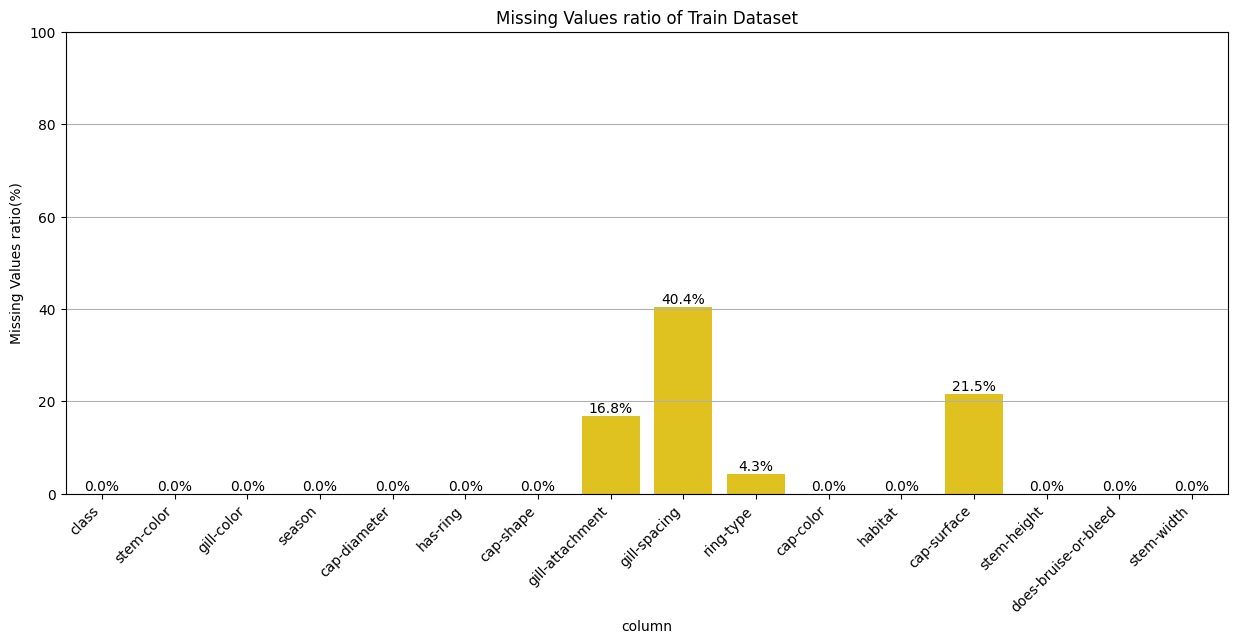

In [30]:
# 첫번째 그래프
# 각 열의 결측치 비율 계산
missing_ratio3 = df_train_cleaned.isnull().sum() / len(df_train_cleaned) * 100

# DataFrame으로 변환
missing_df3 = pd.DataFrame({'column': missing_ratio3.index, 'missing_ratio': missing_ratio3.values})

# seaborn을 이용한 시각화 (깔끔하고 다양한 옵션 제공)
plt.figure(figsize=(15, 6))
plt.grid(True) # 그리드 추가
ax3 = sns.barplot(x='column', y='missing_ratio', data=missing_df3, color='#FFD700')

# x축 레이블을 열 이름으로 설정 (회전하여 가독성 향상)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values ratio of Train Dataset')

# y축 레이블 설정
plt.yticks(range(0, 101, 20))
plt.ylabel('Missing Values ratio(%)')

# 각 막대 위에 결측치 비율 표시
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2.,
            height + 0.8,
            '{:.1f}%'.format(height),
            ha="center")
    
# 그래프 출력
plt.show()

## 7. Visualize EDA

### Target Distribution

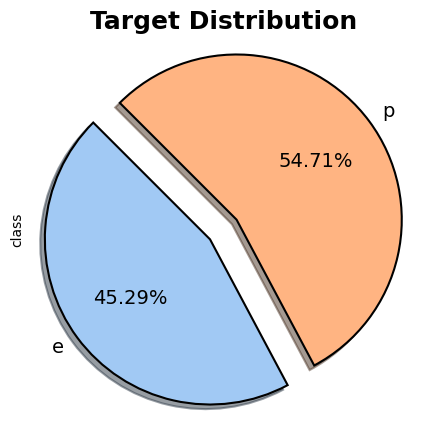

In [31]:
plt.figure(figsize=(5, 5))
colors = sns.color_palette("pastel")
explode = [0.1 for _ in range(df_train_cleaned['class'].nunique())]

# Plotting
df_train_cleaned.groupby('class')['class'].count().plot.pie(
    colors=colors,
    explode=explode,
    autopct="%.2f%%",
    shadow=True,  # Adding shadow for better visibility
    startangle= 135,  # Start angle for better alignment
    textprops={'fontsize': 14},  # Adjust text size
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  # Adding edge color and width
)

# Adding a title
plt.title('Target Distribution', fontsize=18, weight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Displaying the plot
plt.show()

### Numerical Features Distribution

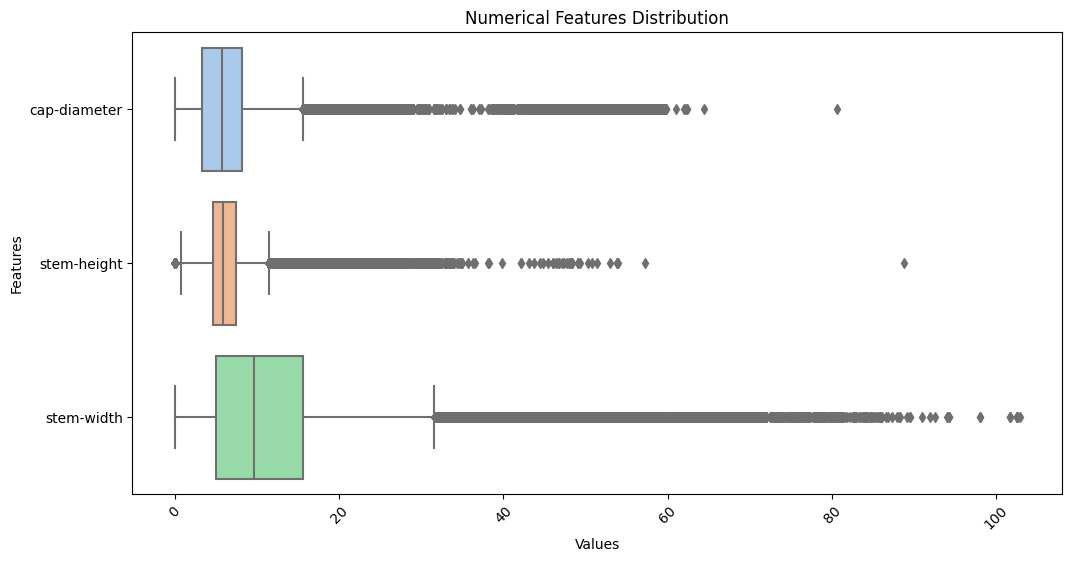

In [32]:
df_num = df_train_cleaned[num_columns]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_num, orient='h', palette="pastel")
plt.title('Numerical Features Distribution')
plt.xlabel('Values')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()

### We find that there are many outliers in numerical variables. Tree-based models that are robust to outlier classification should be used.

### Categorical Features Distribution

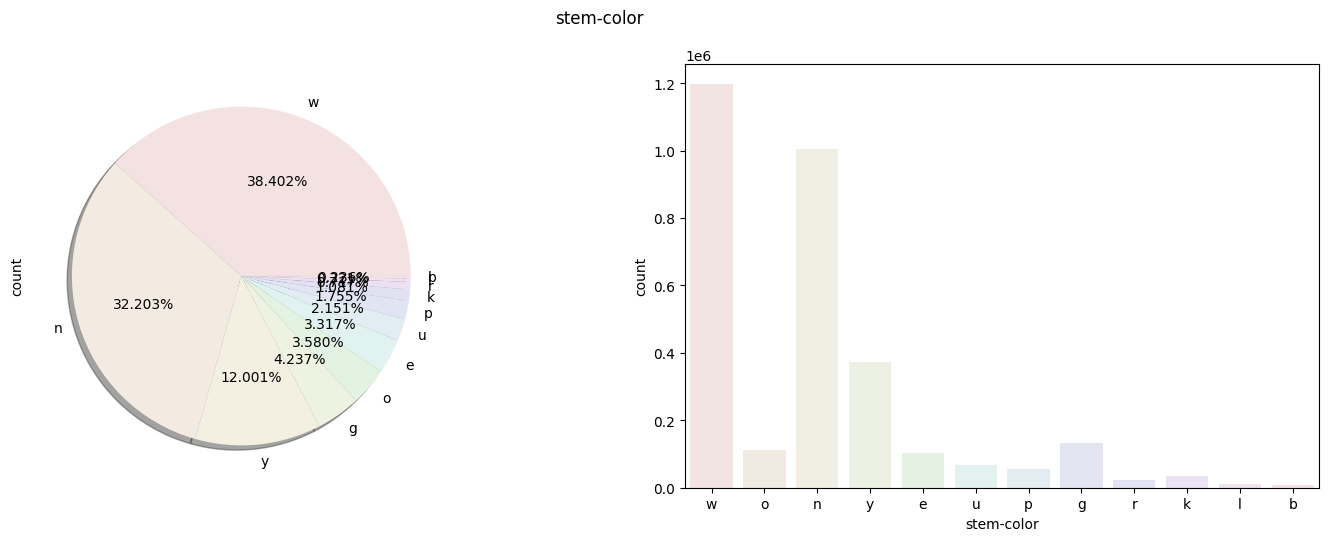

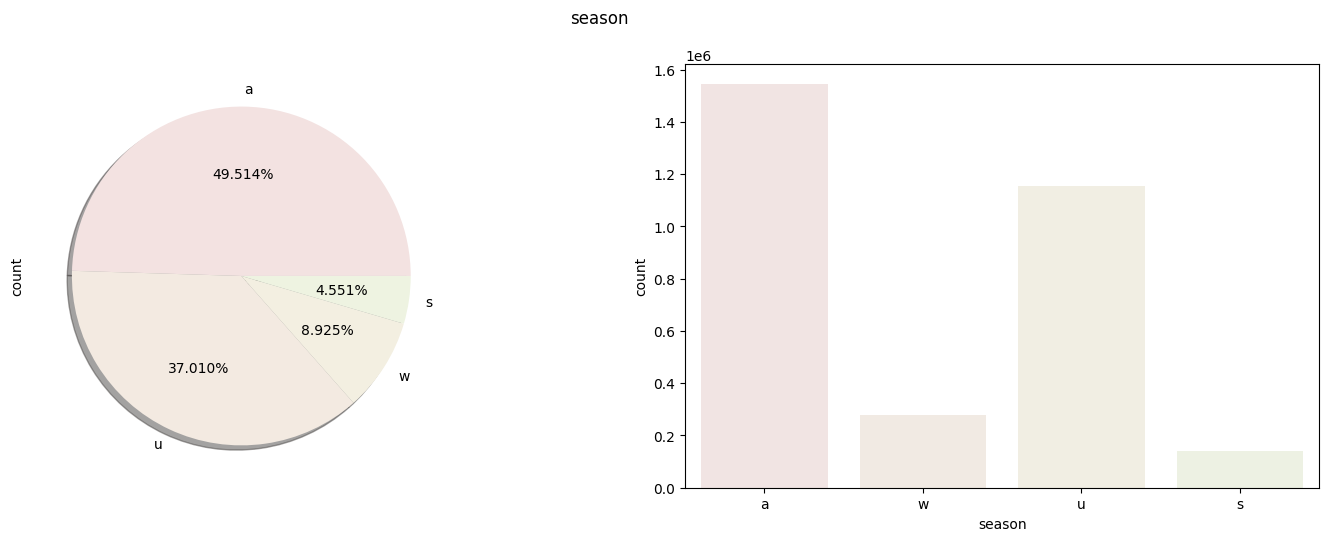

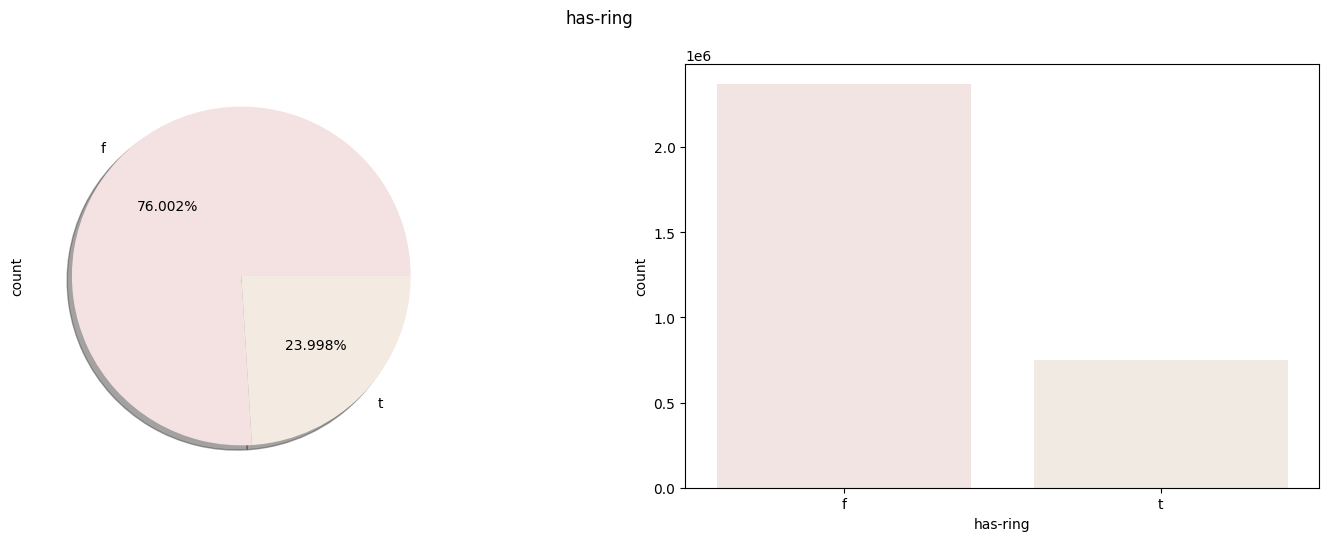

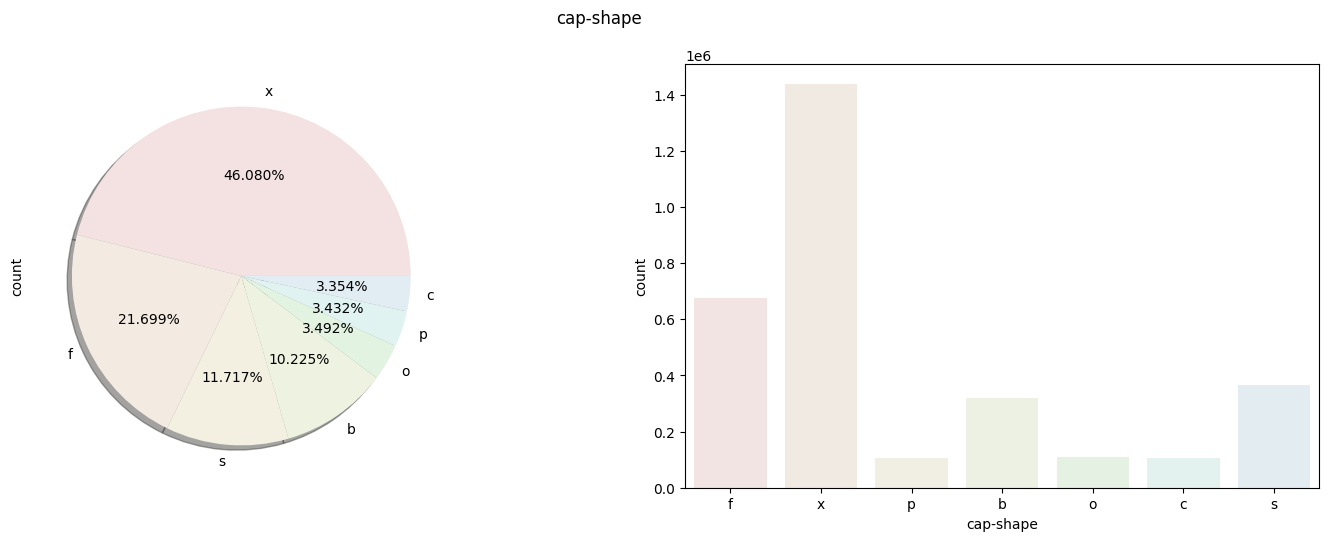

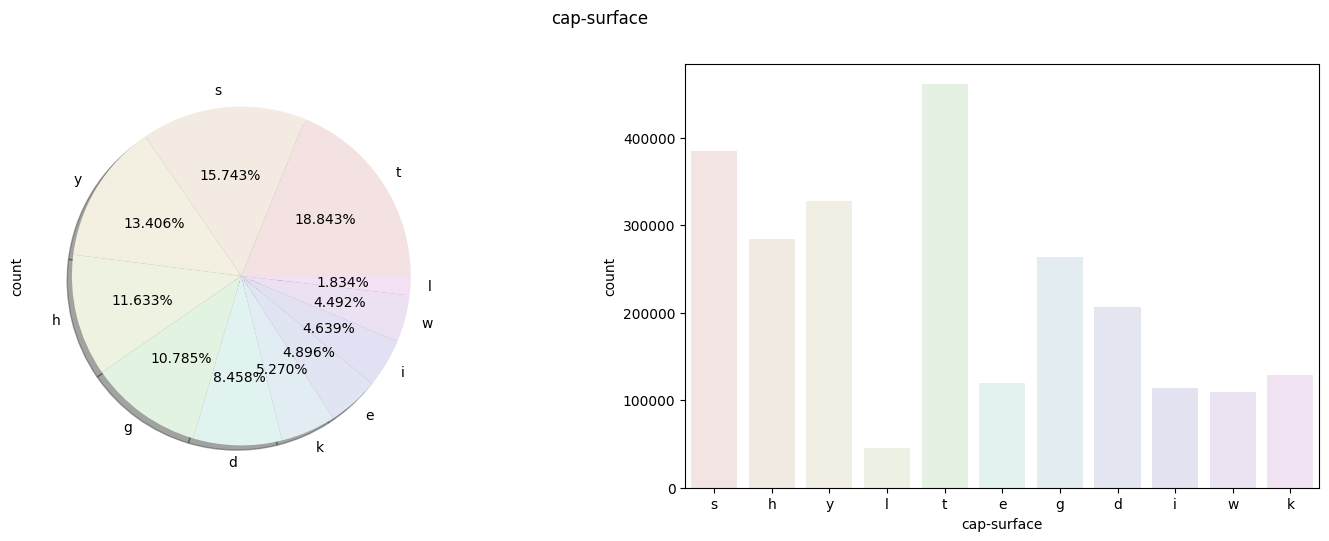

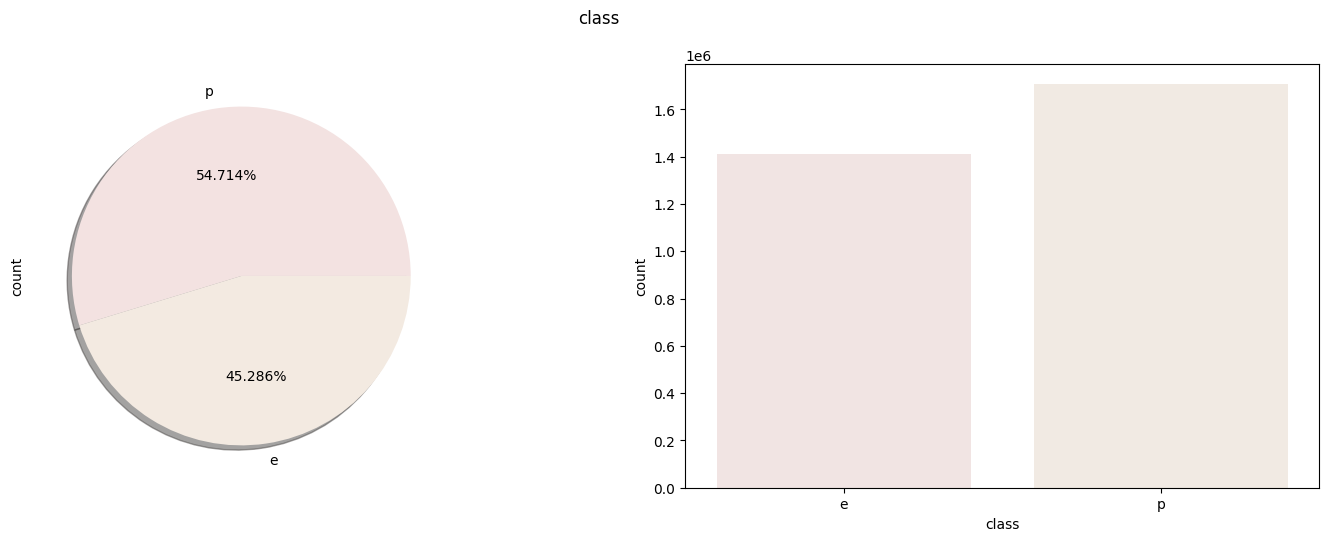

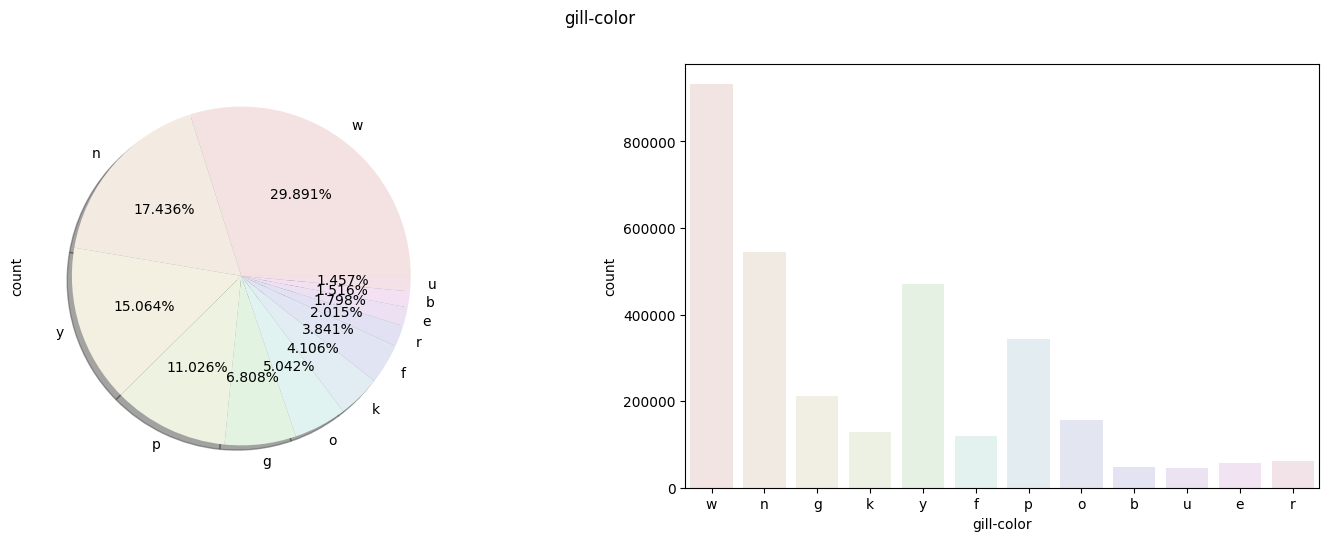

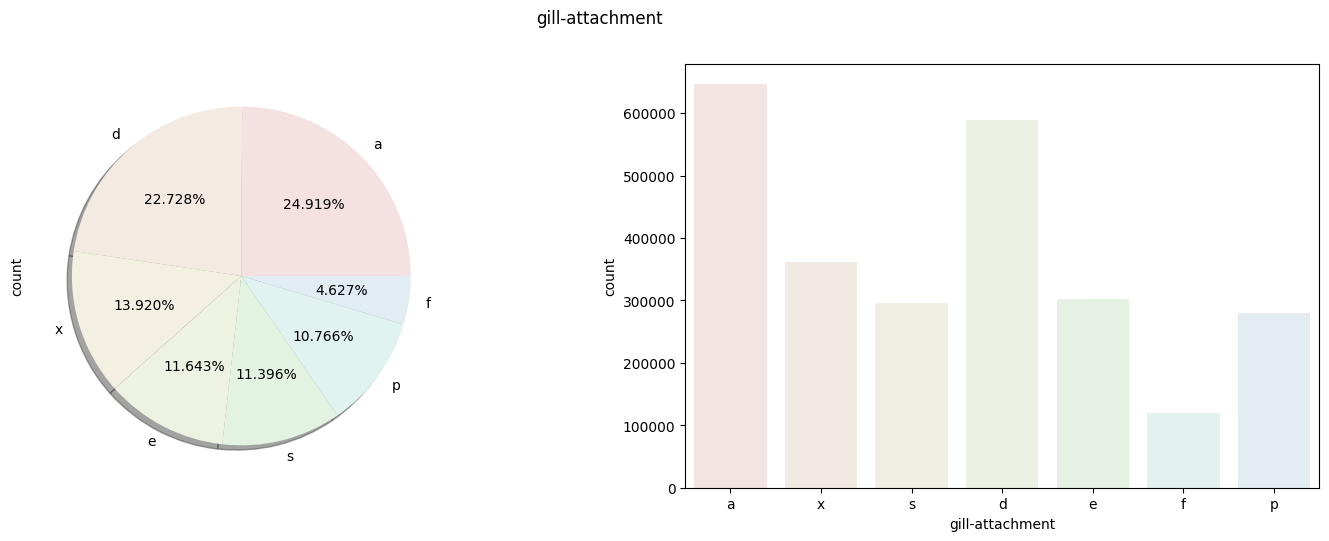

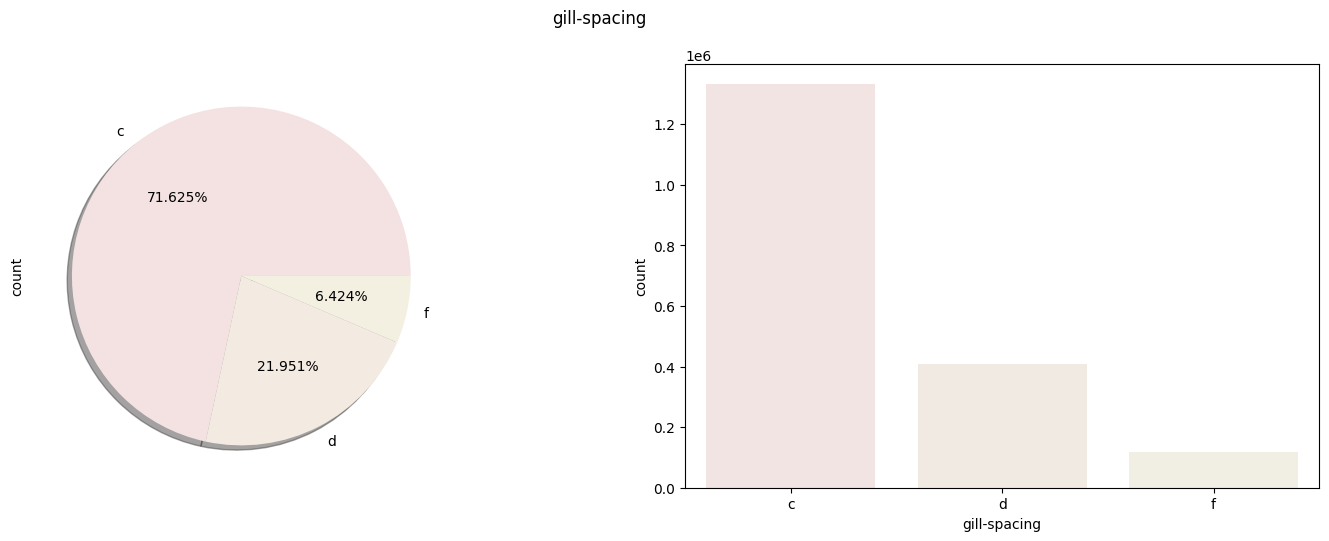

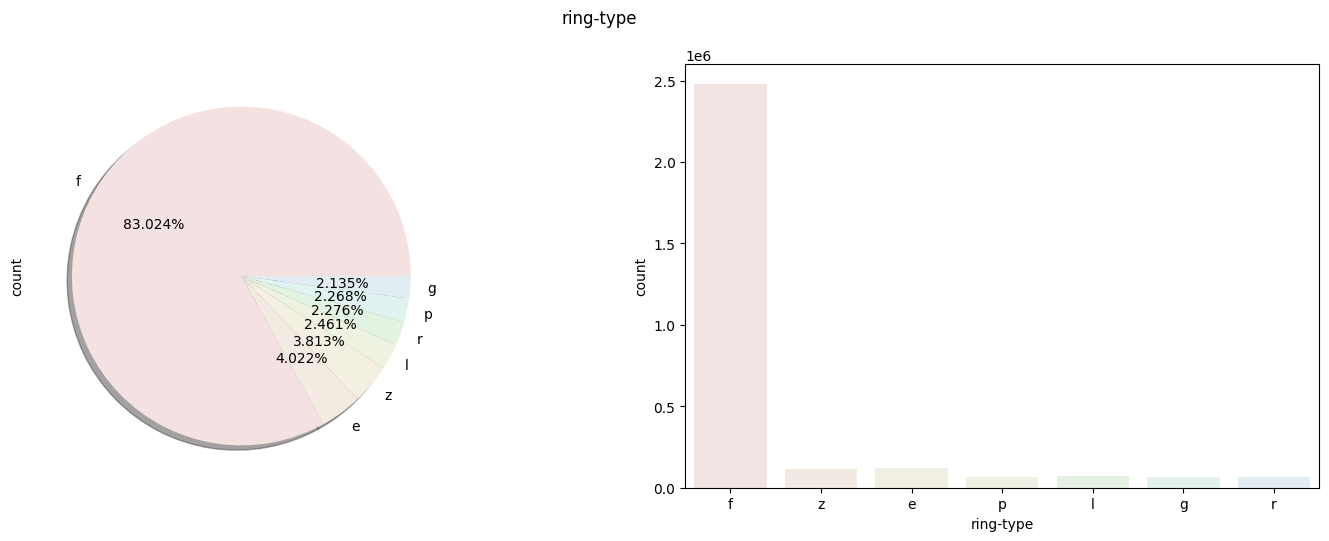

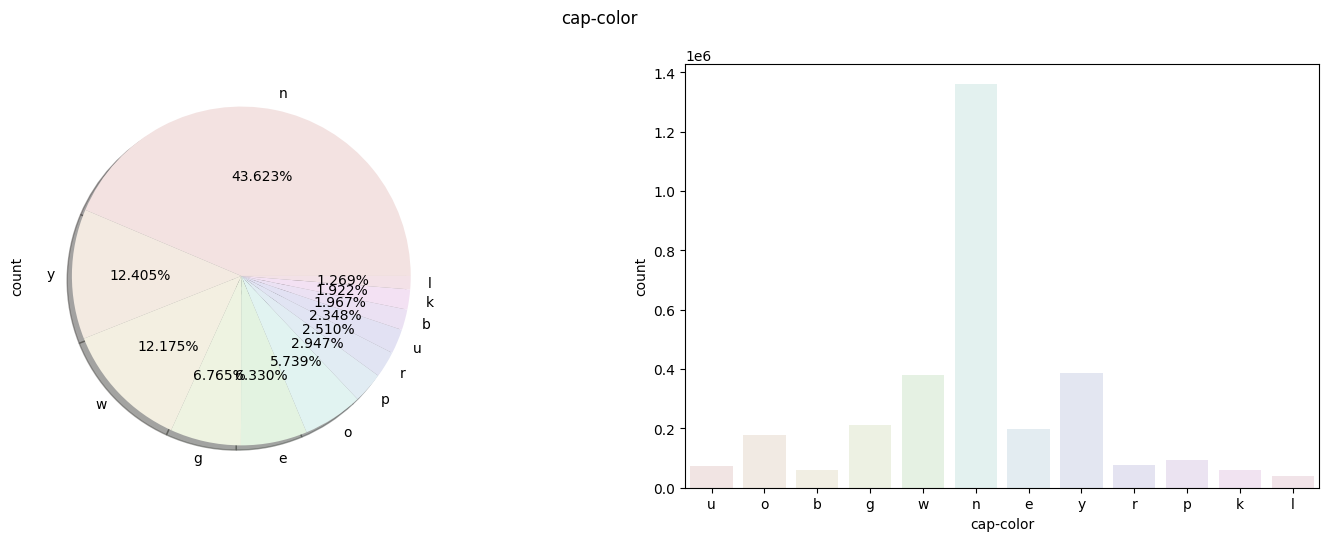

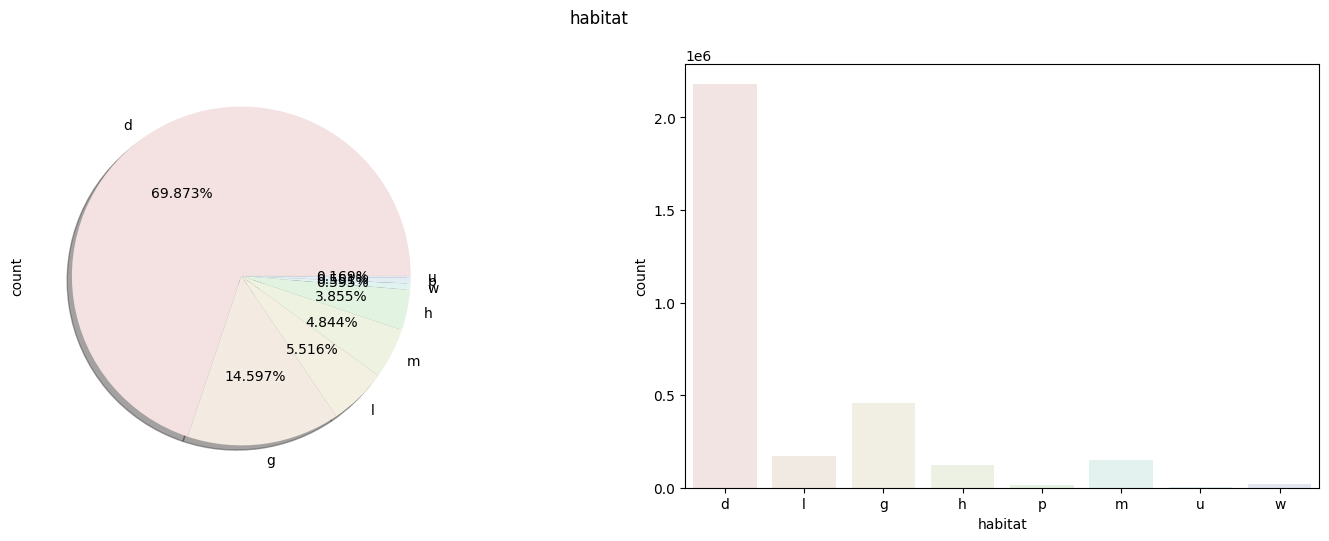

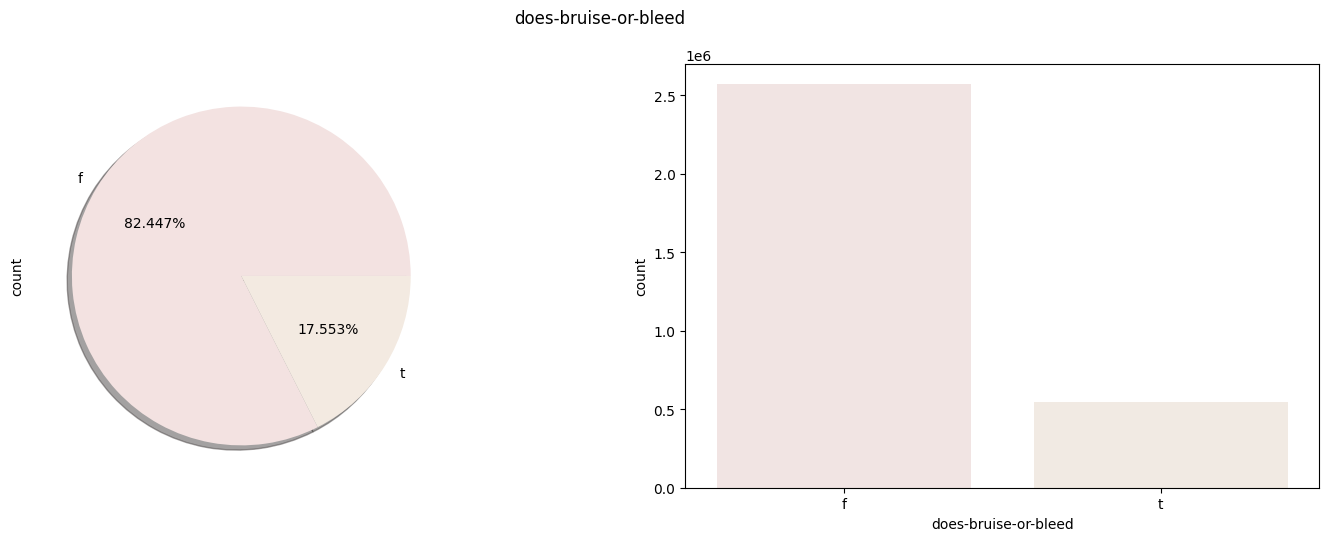

In [33]:
base_colors = ['#f3e2e1', '#f3eae1', '#f3efe1', '#eef3e1', '#e3f3e1', '#e1f3f1', '#e1ecf3', '#e1e4f3', '#e2e1f3', '#ebe1f3', '#f3e1f3', '#f3e1e7']

for column in cat_columns :
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))
    
    unique_values_count = df_train_cleaned[column].nunique()
    colors = base_colors[:unique_values_count]
    
    df_train_cleaned[column].value_counts().plot.pie(autopct='%1.3f%%', ax=ax[0], shadow=True, colors=colors)
    sns.countplot(x=column, data=df_train_cleaned, ax=ax[1], palette=colors)
    plt.suptitle(f'{column}')
    plt.show()

### Correlationship between Numerical Features and Numerical Features

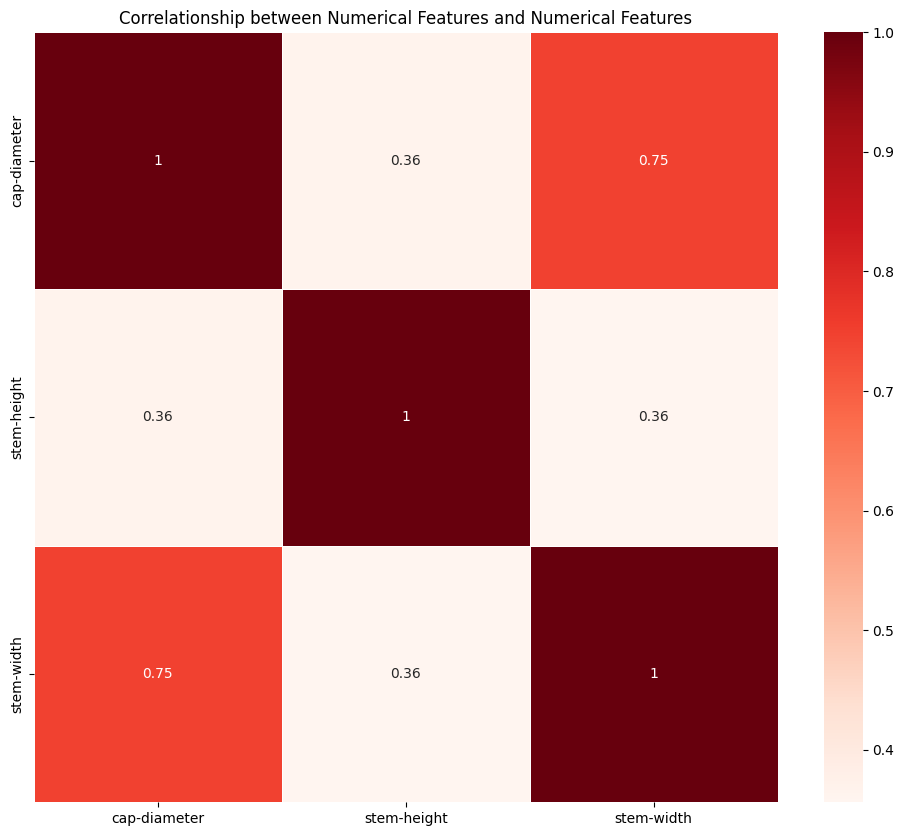

In [34]:
corr_matrix = df_train_cleaned[num_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', linewidths=0.5)
plt.title('Correlationship between Numerical Features and Numerical Features')
plt.show()

### Correlationship between Numerical Features and Target

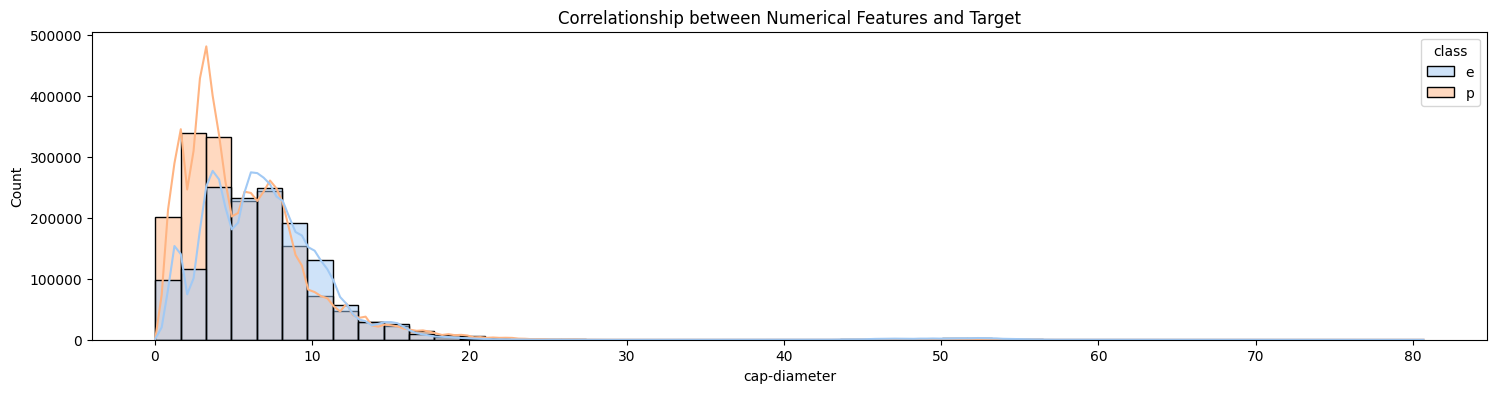

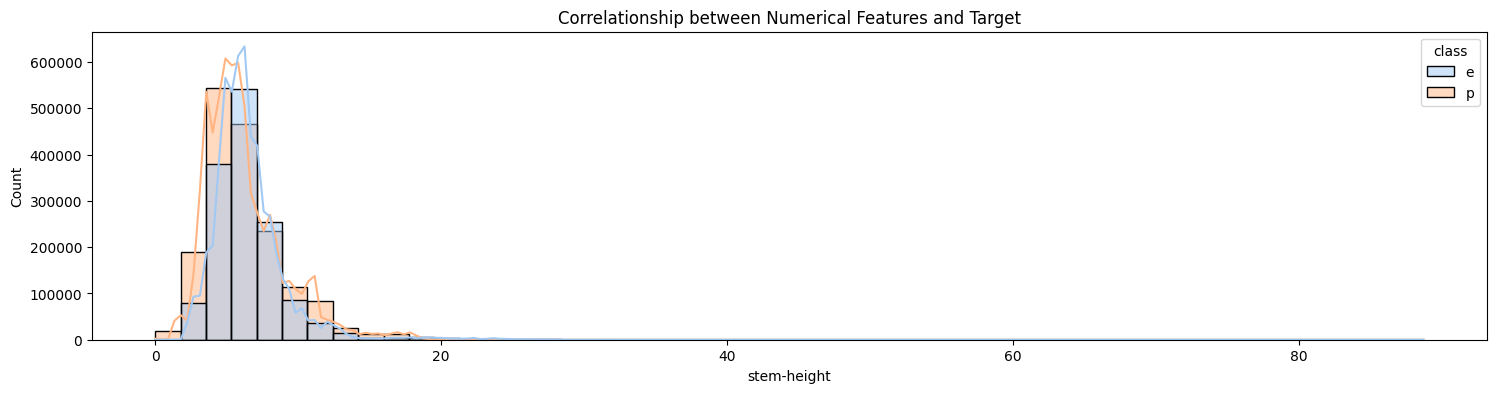

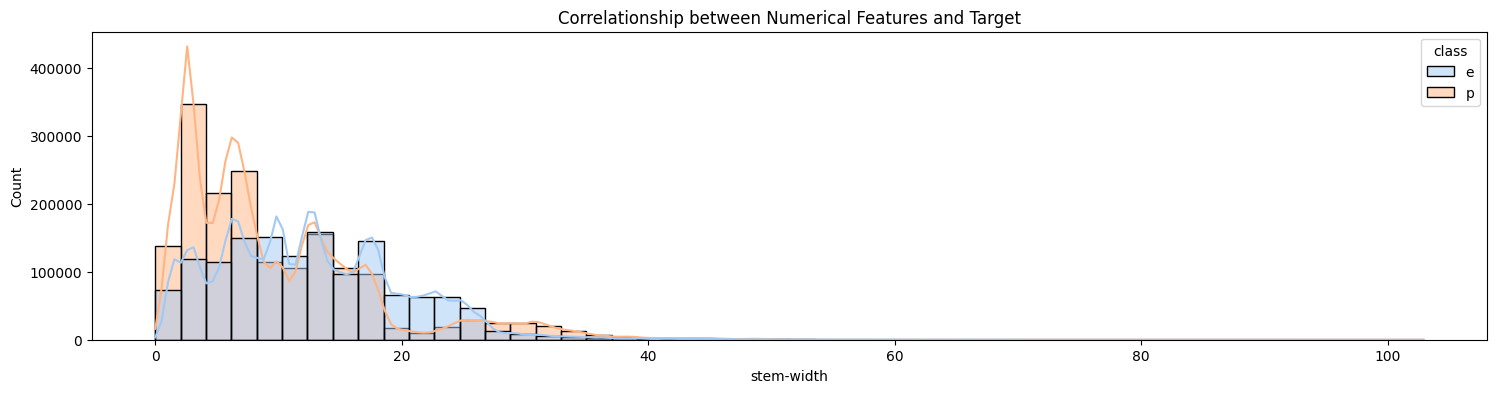

In [35]:
for column in num_columns :
    fig, ax = plt.subplots(figsize=(18, 4))
    sns.set_palette("pastel")
    fig = sns.histplot(data=df_train_cleaned, x=column, hue="class", bins=50, kde=True)
    plt.title('Correlationship between Numerical Features and Target')
    plt.show()

### Correlationship between Categorical Features and Target

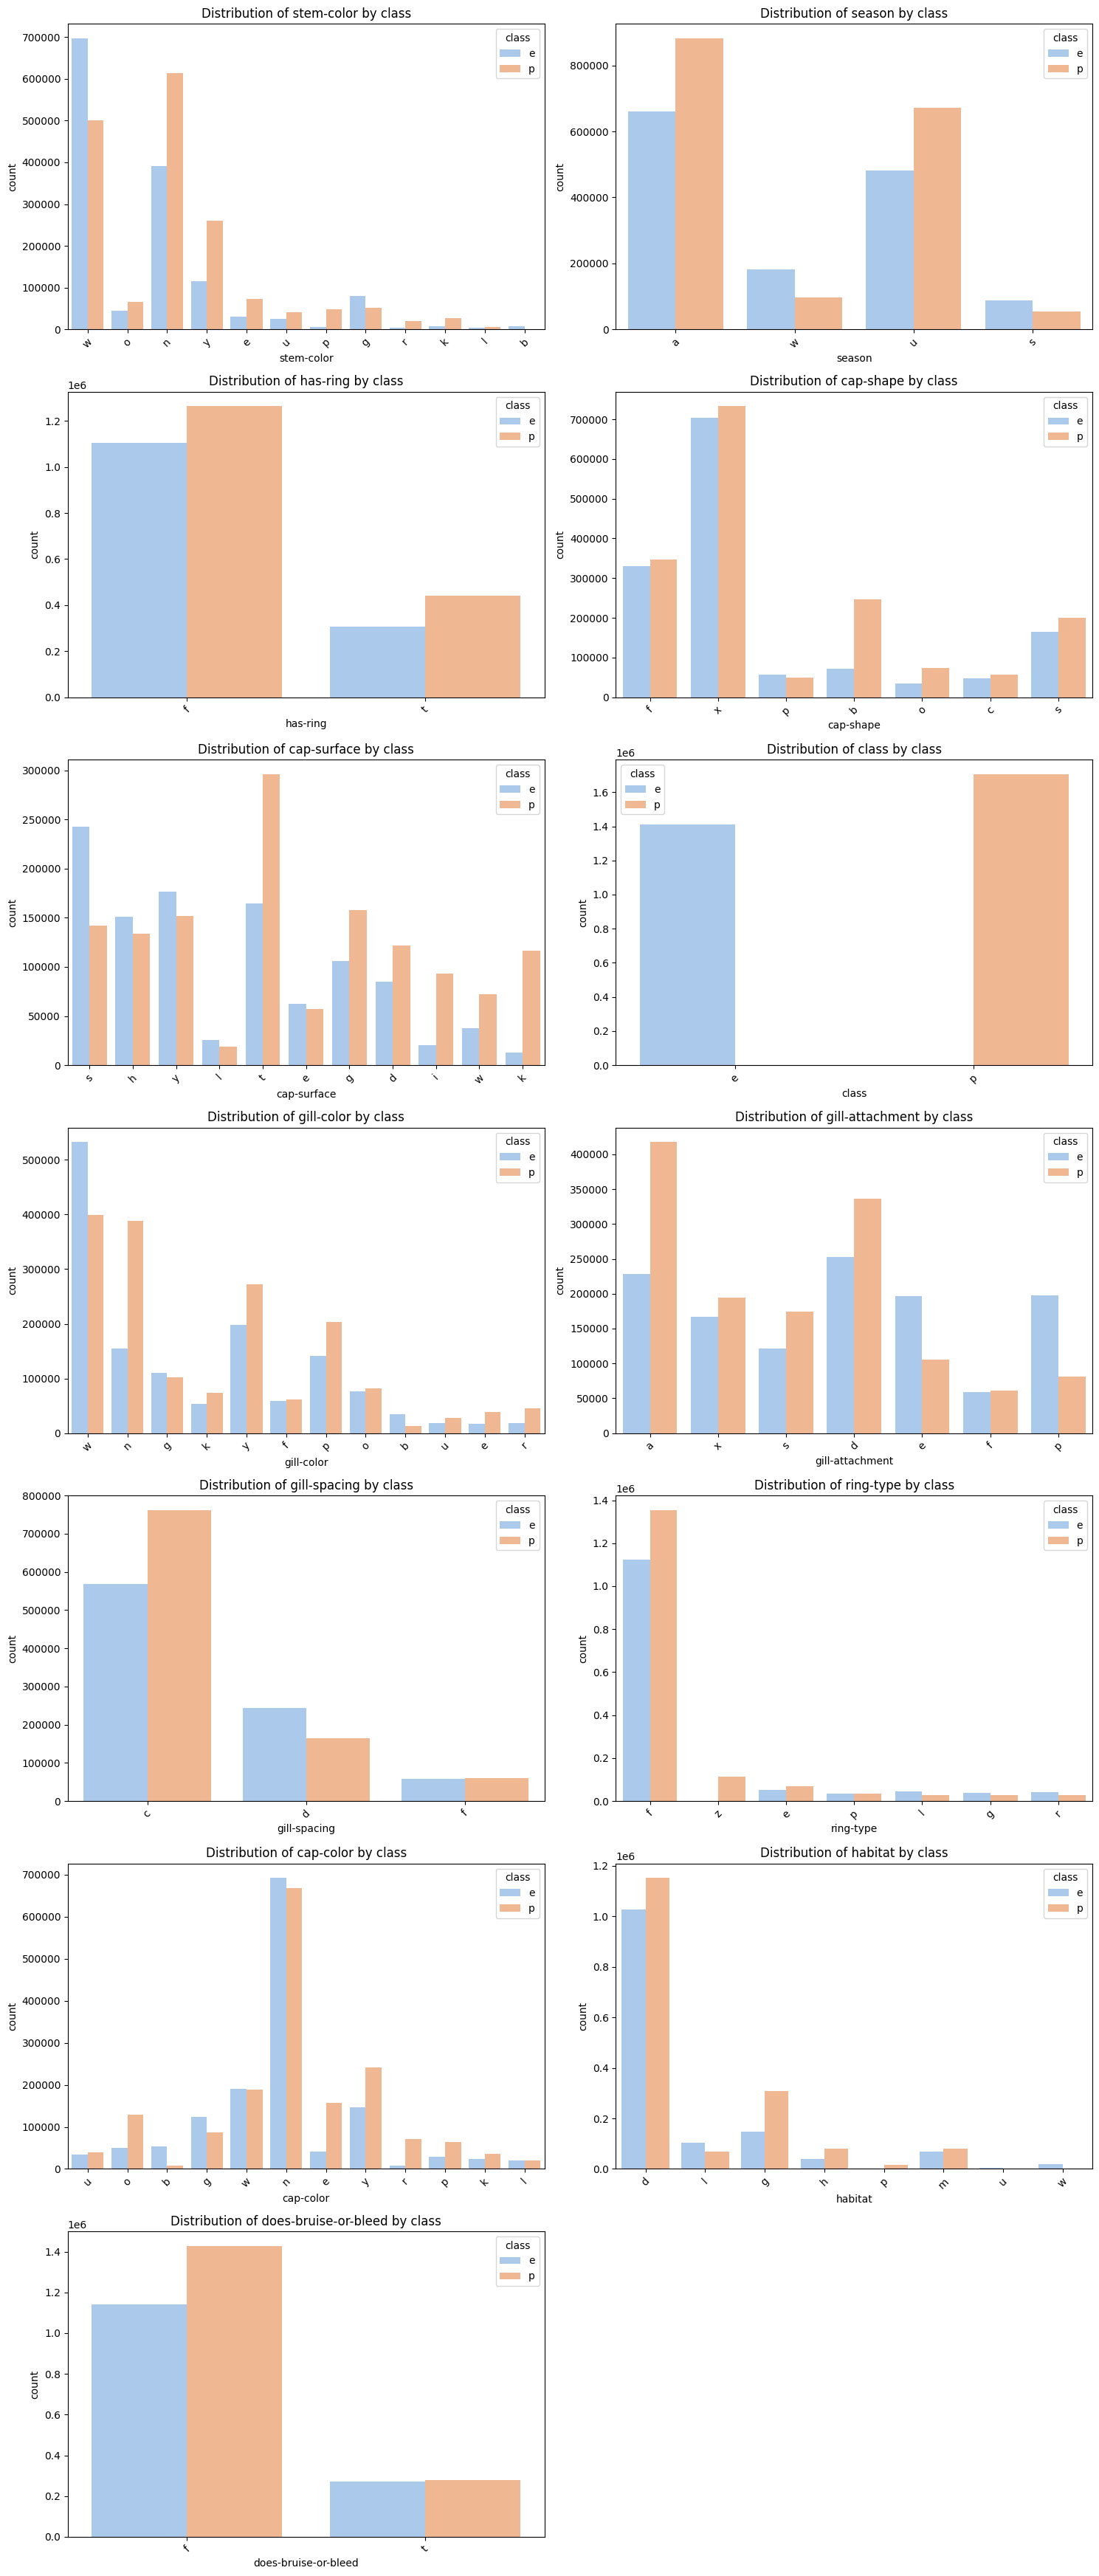

In [36]:
target_variable = 'class' 

num_cols = 2  
num_rows = (len(cat_columns) + 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(cat_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df_train_cleaned, x=col, hue=target_variable)
    plt.title(f'Distribution of {col} by {target_variable}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

## 8. Modeling

In [37]:
for column in df_train_cleaned.columns:
    if df_train_cleaned[column].dtype == 'object':
        df_train_cleaned[column].fillna('missing', inplace=True)
    else:
        pass

In [38]:
label_encoders = {}
for column in df_train_cleaned.select_dtypes(include=['object']):
    le = LabelEncoder()
    le.fit(df_train_cleaned[column])  # 학습 데이터만 사용하여 학습
    label_encoders[column] = le

for column, le in label_encoders.items():
    df_train_cleaned[column] = le.transform(df_train_cleaned[column])


'''
X_train = pd.get_dummies(X_train, columns = X_train.select_dtypes(include=['object']).columns)
X_test = pd.get_dummies(X_test, columns= X_test.select_dtypes(include=['object']).columns)
y_train = pd.get_dummies(y_train, columns= y_train.select_dtypes(include=['object']).columns)
y_test = pd.get_dummies(y_test, columns= y_test.select_dtypes(include=['object']).columns)
'''

"\nX_train = pd.get_dummies(X_train, columns = X_train.select_dtypes(include=['object']).columns)\nX_test = pd.get_dummies(X_test, columns= X_test.select_dtypes(include=['object']).columns)\ny_train = pd.get_dummies(y_train, columns= y_train.select_dtypes(include=['object']).columns)\ny_test = pd.get_dummies(y_test, columns= y_test.select_dtypes(include=['object']).columns)\n"

In [39]:
X = df_train_cleaned.drop('class', axis=1)
y = df_train_cleaned['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
cat_columns2 = list(set(cat_columns) - set(target))

In [41]:
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(cat_features = cat_columns2, verbose=0)
}

## 9. Evaluating

In [42]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"{name} MCC: {mcc}")

RandomForest MCC: 0.9823539060593486
XGBoost MCC: 0.9794388727217471
[LightGBM] [Info] Number of positive: 1364404, number of negative: 1129152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.299903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 2493556, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547172 -> initscore=0.189251
[LightGBM] [Info] Start training from score 0.189251
LightGBM MCC: 0.9728837420028837
CatBoost MCC: 0.9813813625612093


## 10. Submitting

In [43]:
df_test = df_test.drop(columns = ['id', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'])


median = df_test['cap-diameter'].median()
df_test['cap-diameter'].fillna(median, inplace=True)


median = df_test['stem-height'].median()
df_test['stem-height'].fillna(median, inplace=True)


def transform_rare_labels2(col):
    counts_labels = df_test[col].value_counts()
    frequent_labels = counts_labels[counts_labels > 4000].index.tolist()
    return df_test[col].replace(to_replace=set(counts_labels.index) - set(frequent_labels), value=np.nan)


for col in cat_columns:
    df_test.loc[:, col] = transform_rare_labels(col)

    
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        df_test[column].fillna('missing', inplace=True)
    else:
        pass

In [ ]:
for column, le in label_encoders.items():
    df_test[column] = le.transform(df_test[column])

'''
df_test = df_test[df_train_cleaned.columns]
'''

In [ ]:
predictions = model.predict(df_test)

In [ ]:
output = pd.DataFrame({'id': df_smaple_submission.id, 'class': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")